In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


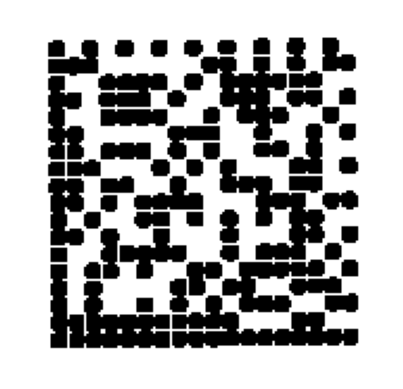

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/image_DM.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Laplacian edge detection
edges = cv2.Laplacian(blurred, cv2.CV_8U, ksize=3)

# Create a blank image with the same size as the input image
blank_image = np.ones_like(image) * 255

# Iterate through the edges and fill the nearby pixels
for row in range(edges.shape[0]):
    for col in range(edges.shape[1]):
        if edges[row, col] > 20:  # Adjust the threshold value as per your image
            blank_image[row-1:row+2, col-1:col+2] = 0

# Display the result
plt.imshow(blank_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


In [ ]:
image=blank_image

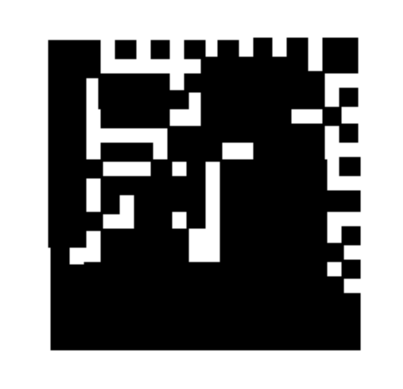

In [ ]:
# Convert the binary image to uint8 format
image = np.uint8(image)

# Find contours in the binary image
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert the binary image to color for visualization
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Iterate over the contours
for contour in contours:
    # Calculate the bounding rectangle for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Replace the contour with a filled black rectangle
    cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 0, 0), -1)

# Find the inverse of the binary image to get the gaps
inverse_binary = cv2.bitwise_not(image)

# Find contours in the inverse binary image
gap_contours, _ = cv2.findContours(inverse_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the gap contours
for gap_contour in gap_contours:
    # Calculate the bounding rectangle for each gap contour
    x, y, w, h = cv2.boundingRect(gap_contour)

    # Draw a filled white rectangle for each gap
    cv2.rectangle(image_color, (x, y), (x + w, y + h), (255, 255, 255), -1)
# Display the result
inverted_image = cv2.bitwise_not(image_color)

plt.imshow(inverted_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

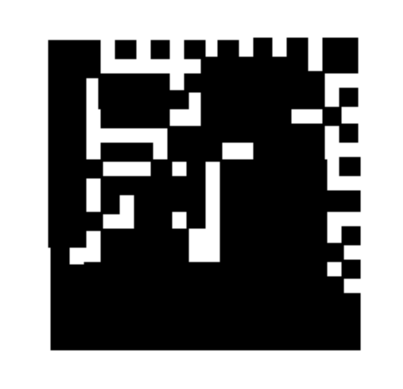

In [ ]:
# inverted_image
# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform morphological closing operation to close small gaps between rectangles
closing = cv2.morphologyEx(inverted_image, cv2.MORPH_CLOSE, kernel)

# Perform morphological opening operation to remove noise (small black rectangles)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

# Bitwise XOR operation to obtain the difference between opening and image
difference = cv2.bitwise_xor(opening, inverted_image)

# Bitwise OR operation to combine the difference with the opening
result = cv2.bitwise_or(opening, difference)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [ ]:
cv2.imwrite("input_image.png", result)

True

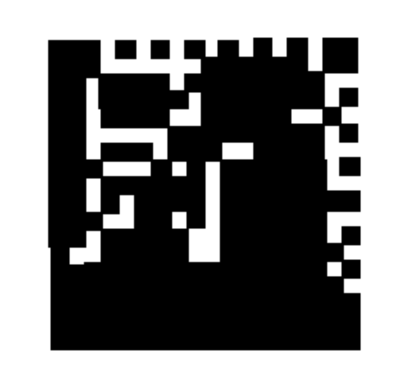

In [ ]:

image_path = '/content/input_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to convert the image into binary (black and white)
_, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)


# Define the kernel for the morphological operation
kernel_size = 3  # Adjust this value as needed
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Perform the morphological closing operation
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
kernel_size = 50  # Adjust this value as needed

closed_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)


# Display the closed image
plt.imshow(closed_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()